# Analysing State Farm Datasets

## Loading the Libraries & Datasets

First step is to load all the main libraries as follow:

In [1]:
%matplotlib inline 
import pandas as pd # read and wrangle dataframes and data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading the training dataset

We will load both the training and testing dataset in order to clean and prepare the data for model training

In [2]:
# To import the train dataset from the computer as csv file.
train = pd.read_csv('exercise_40_train.csv')

### Loading the testing dataset

In [3]:
# To import the test dataset from the computer as csv file.
test = pd.read_csv('exercise_40_test.csv')

## Exploratory Data Analysis (EDA)

* In order to make something from data, we need to explore data. 

* Let's start with *head( )* to explore the features and target variable that is *class*

In [4]:
# This code allows to display all features to facilitate understanding the data.
pd.set_option('display.max_columns', None)

# Look at the top of the dataframe
train.head() # for the first 5 rows

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,$-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,$-1864.9622875143,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,$-543.187402955527,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,$-182.626380634258,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.76

In [5]:
# Look at the bottom end of the dataframe
train.tail() # for the last 5 rows

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
39995,0,1.593480,19.628352,Sun,0.794697,-0.825849,0.608774,-0.0085%,2.183834,3.202119,-0.723356,94.820410,4.784491,0.221237,NaN,1.519646,NaN,8.075509,90.001371,$3750.51991954505,5.419699,26.170655,27.655416,-0.120748,female,5.326209,2.105029,1066.778275,11.273001,0.353616,NaN,no,-1.028393,NaN,43.938624,1.057238,79.557748,33.747509,-0.521875,5-10 miles,10.179765,97792.132925,0.906766,1.583914,4.070857,3.389141,1.094705,46.141238,56.630725,9.656568,3566.624850,1.861636,NaN,64.838212,NaN,4.971598,-0.194605,NaN,300.629990,0,July,NaN,5.426661,-2.644819,46.250533,farmers,0.286730,14.402071,NaN,0.241035,1.332147,-0.000234,48.956297,7.595050,-2.946092,-0.217026,NaN,NaN,NaN,1.0,10.148989,-1.255758,-6.751673,3.594673,2.138771,NaN,50.458073,-0.209108,-0.821945,NaN,3.017092,-1.640259,5.051545,no,5.798509,NaN,10.854903,9.505529,1,yes,98.855726
39996,0,1.708685,17.132638,Thursday,-2.676659,1.153851,0.465905,0.0077%,-0.048613,3.989567,1.468074,115.785563,3.682934,3.581121,0.986675,0.801205,100.310553,4.905220,76.554450,$448.867118077561,2.803151,6.047728,66.488564,0.506781,male,9.716649,2.294877,893.822099,18.253797,1.081956,NaN,yes,0.028793,Illinois,52.955840,4.201217,69.100027,29.863951,95.129824,5-10 miles,15.199744,NaN,3.034677,-0.547537,NaN,-1.179405,1.113210,51.108985,63.108851,NaN,1093.607996,5.791624,3.505938,73.388658,-1.307665,3.028696,-0.781529,NaN,445.078457,0,July,12.223653,4.211871,0.076035,48.662547,progressive,-0.060898,14.402071,11.506345,1.954358,0.406104,-0.000234,50.555205,0.204558,-0.868781,0.409701,-0.525138,ford,45.960119,1.0,11.572045,0.766626,-6.584895,1.274211,2.138771,102.410627,41.223810,0.029031,-0.021201,8.706170,4.406889,-0.195783,2.020510,no,5.285345,-1.408117,8.867221,9.077493,0,yes,101.880335
39997,0,1.704132,17.824399,Monday,-0.581360,NaN,0.467339,-0.0216%,0.904643,2.975563,0.228908,107.939412,1.141497,2.859400,-0.188610,-1.342539,100.859798,5.787191,86.793013,$834.95775080472,7.351940,2.048280,73.650617,1.085774,male,4.910666,1.157599,983.185818,7.703766,1.110939,-0.476073,yes,0.359350,NaN,52.663621,2.555266,76.705362,29.920907,53.454709,5-10 miles,13.760100,98811.451149,-0.189270,1.732179,NaN,-0.790317,0.018358,58.107523,59.923473,NaN,2330.832459,1.726183,-1.126181,68.035109,-1.038265,NaN,0.574095,NaN,300.629990,0,August,13.097685,8.590030,0.122905,48.656016,geico,-0.069589,11.196932,15.579129,1.537981,0.783291,-0.000234,53.679032,1.864031,1.133368,2.431565,NaN,ford,54.446944,1.0,12.974767,-2.302206,-7.505579,0.501725,3.830929,91.071829,45.946040,0.041528,-1.258134,7.275794,4.537489,-0.071581,6.250353,no,4.729509,-1.118486,12.244620,7.663763,1,yes,100.022536
39998,0,3.963408,20.285597,Tuesday,0.430116,0.050189,1.821565,1e-04%,-0.401259,-0.247649,-0.499294,93.314126,-0.627155,-0.403161,1.309358,1.411679,100.481909,6.469207,72.918124,$-48.1031003332715,7.669961,6.653958,87.874367,0.691890,male,3.010525,1.572497,804.891356,18.981256,4.398277,NaN,no,2.850353,Ohio,47.389225,2.200456,65.784171,29.236547,73.426865,5-10 miles,10.772991,97926.384698,NaN,0.830966,NaN,NaN,0.704807,41.613442,58.407313,6.187162,3247.966843,2.981407,20.449765,67.260998,NaN,NaN,-1.777501,NaN,300.629990,0,December,6.896604,2.484889,0.776774,51.222759,farmers,-0.086648,14.402071,21.402776,-1.302925,1.198053,-0.000234,51.291860,2.710170,-0.991268,0.504429,NaN,NaN,NaN,1.0,NaN,0.666452,-7.408004,4.919613,2.138771,83.713027,49.908571,0.498621,-0.046309,NaN,4.724964,-1.248535,8.928009,no,6.803781,NaN,9.876172,8.644538,0,yes,109.460219
39999,0,2.574164,16.442850,Thursday,-1.166067,-1.198482,0.180549,0.0034%,-0.273818,10.333122,1.648048,107.167219,6.662493,2

In [6]:
# Look at the type of the dataframe
print('Type of the dataset', train.dtypes)

Type of the dataset y         int64
x1      float64
x2      float64
x3       object
x4      float64
         ...   
x96     float64
x97     float64
x98       int64
x99      object
x100    float64
Length: 101, dtype: object


In [7]:
# Look at the shape of the dataframe
print('Shape of the dataset')
print ("Shape of train data:", train.shape)
print ("Shape of test data:", test.shape)

Shape of the dataset
Shape of train data: (40000, 101)
Shape of test data: (10000, 100)


In [8]:
# Getting information about the training dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [9]:
# To display each column name
train.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100'],
      dtype='object', length=101)

In [10]:
train.describe()

,y,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x100
count,40000.000000,40000.000000,40000.000000,40000.000000,37572.000000,40000.000000,40000.000000,40000.000000,40000.000000,34890.000000,40000.000000,40000.000000,30136.000000,40000.000000,28788.000000,40000.000000,40000.000000,40000.000000,40000.000000,37613.000000,40000.000000,40000.000000,37567.000000,40000.000000,40000.000000,40000.000000,7664.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,37598.000000,40000.000000,30497.000000,30271.000000,40000.000000,5753.000000,31991.000000,40000.000000,40000.000000,40000.000000,27177.000000,40000.000000,40000.000000,23818.000000,40000.000000,27272.000000,22304.000000,40000.000000,7536.000000,40000.000000,40000.000000,32707.000000,40000.000000,37580.000000,34899.000000,40000.000000,37575.000000,37616.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,27084.000000,34755.000000,34751.000000,28627.000000,37570.000000,34744.000000,40000.000000,40000.000000,37572.000000,40000.000000,30285.000000,37593.000000,40000.000000,37669.000000,29309.000000,40000.000000,34741.000000,37565.000000,37660.000000,27396.000000,33362.000000,40000.000000,40000.000000,40000.000000
mean,0.145075,2.999958,20.004865,0.002950,0.005396,0.007234,0.004371,2.722334,0.490339,100.008988,3.039317,3.881807,0.787999,0.011162,100.702408,8.005758,79.936742,4.962774,11.030799,72.135445,0.202855,4.979892,0.001688,999.260857,15.022117,1.009982,0.020762,0.552148,52.971716,1.377624,70.003007,31.005898,36.039836,14.966821,99994.120795,0.651686,0.504630,1.115563,0.564405,0.025262,49.979288,60.012715,10.299127,2099.960510,1.478683,4.986956,69.980858,0.004900,3.017140,0.498347,32.660648,300.422034,0.099650,10.017561,3.820924,-0.004021,50.020462,0.000904,14.415957,14.934315,0.000815,0.735386,0.000997,49.951629,6.928531,-0.001297,1.427536,-1.024062,49.933173,0.899255,10.024464,0.021090,-6.096573,3.820098,2.138496,99.987203,49.985343,-0.006049,0.453763,10.767838,3.000166,0.001636,4.002896,3.969385,0.031886,10.525530,10.002814,0.497650,100.024743
std,0.352181,1.994490,1.604291,1.462185,1.297952,1.358551,1.447223,1.966828,1.029863,13.343010,3.575534,2.678838,0.751117,1.480175,1.058560,2.270345,6.514228,3.544050,15.652503,26.890151,1.020094,2.442622,1.562125,104.197073,3.669128,1.418182,1.565846,1.893282,5.808011,1.678159,4.279912,3.397154,26.155245,3.243429,1343.329651,1.165203,1.033895,1.611816,1.204236,1.773983,4.438896,5.517545,2.696886,946.689773,1.580287,7.245175,4.975141,1.356709,1.844189,1.451026,8.419679,35.005180,0.299537,3.441451,2.236371,1.513578,4.986917,1.476789,1.160265,6.336299,1.352481,0.366656,0.426451,6.513115,5.592746,1.443795,2.390149,1.213259,4.178547,0.300995,2.566513,1.548012,2.287201,2.514043,0.780404,10.455759,4.813166,1.180598,1.090578,3.732763,1.164411,1.468790,3.017420,1.473939,1.823091,1.437581,1.986984,0.500001,5.247514
min,0.000000,-3.648431,13.714945,-5.137161,-5.616412,-6.113153,-6.376810,-3.143438,-3.538129,50.526543,-5.846331,-3.060994,-0.338985,-6.141315,99.131018,-1.384508,66.756855,-9.561032,-3.819778,4.263648,-3.943834,-2.489909,-6.516479,604.067215,-1.074573,-4.165802,-4.775358,-3.966788,29.351461,-3.500424,52.327899,17.179476,-4.198270,9.999943,94236.454769,-1.187438,-4.538490,-3.697254,-1.319167,-7.269258,31.919387,37.797055,0.521112,-1630.227579,-3.523781,-23.955783,47.976420,-5.191496,0.248270,-5.457856,13.882758,98.627537,0.000000,1.610473,-3.990470,-13.864450,29.918688,-6.715834,4.313964,0.400312,-5.297159,0.008685,-4.378783,25.222808,-3.295149,-5.364030,-3.803147,-7.818713,29.904840,0.000000,2.361436,-5.852824,-11.880645,-2.945215,-2.768332,58.261675,30.681184,-5.237572,-4.580025,6.106024,-2.173310,-6.3281

In [11]:
# Checking for null values
print('Checking for the null values')
print(train.isnull().sum())

Checking for the null values
y           0
x1          0
x2          0
x3          0
x4          0
        ...  
x96      6638
x97         0
x98         0
x99     12836
x100        0
Length: 101, dtype: int64


In [12]:
# To explore the output (Target)
train['y'].unique()

array([0, 1])

In [13]:
train.groupby('y').mean()

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x100
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.989824,19.999118,0.004875,0.017501,0.003569,0.016207,2.721256,0.491300,99.912145,3.035004,3.895645,0.787515,0.014574,100.733205,8.000923,80.082364,4.973356,10.989286,72.172739,0.202855,4.976886,0.005054,998.425228,14.943762,1.010476,0.027582,0.527750,52.963092,1.402848,70.050902,31.009767,36.125946,15.113221,100005.404392,0.645954,0.502597,1.090828,0.561734,0.045208,50.205011,59.993374,10.316160,2092.986902,1.465275,4.761165,70.047088,-0.005583,3.015248,0.506255,32.953023,300.343664,0.099746,10.004994,3.882961,-0.011395,49.995933,-0.001775,14.413374,14.723532,0.002370,0.726725,0.001044,49.957866,6.933241,-0.002564,1.482130,-1.030970,50.059644,0.899524,10.013588,-0.005737,-6.089170,3.807621,2.140088,100.025476,49.969064,-0.001277,0.467344,10.848389,2.995075,-0.001341,4.000279,3.970118,-0.002559,10.554923,9.996584,0.499868,100.011548
1,3.059679,20.038727,-0.008393,-0.066258,0.028833,-0.065374,2.728689,0.484671,100.583483,3.064733,3.800259,0.790879,-0.008946,100.488359,8.034251,79.078594,4.900410,11.275432,71.915495,0.202854,4.997601,-0.018164,1004.185204,15.483867,1.007069,-0.018798,0.695923,53.022539,1.228978,69.720762,30.983097,35.530918,14.104091,99926.982369,0.684741,0.516608,1.263941,0.580088,-0.092279,48.649108,60.126689,10.198372,2141.055891,1.557696,6.325870,69.590566,0.066427,3.028270,0.451747,30.914787,300.883867,0.099087,10.092092,3.455338,0.039266,50.165547,0.016691,14.431250,16.179696,-0.008348,0.786423,0.000718,49.914876,6.900779,0.006167,1.104906,-0.983697,49.189338,0.897667,10.088367,0.179180,-6.140199,3.893642,2.129116,99.761923,50.080599,-0.034169,0.373562,10.260814,3.030165,0.019235,4.018254,3.965047,0.235795,10.343773,10.039525,0.484577,100.102500


In [14]:
# To find the count of each value in the target (Option 1)
train['y'].value_counts()

0    34197
1     5803
Name: y, dtype: int64

In [15]:
# to describe the feature of patient outcomes.
train['y'].describe()

count    40000.000000
mean         0.145075
std          0.352181
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [16]:
# To explore the number of unique values for each feature
for col in train.columns:
    print('{}: {} unique values'.format(col, train[col].nunique()))

y: 2 unique values
x1: 39884 unique values
x2: 39849 unique values
x3: 14 unique values
x4: 39849 unique values
x5: 37414 unique values
x6: 39854 unique values
x7: 663 unique values
x8: 39842 unique values
x9: 39871 unique values
x10: 39776 unique values
x11: 34879 unique values
x12: 39933 unique values
x13: 39913 unique values
x14: 29944 unique values
x15: 39837 unique values
x16: 28630 unique values
x17: 39902 unique values
x18: 39970 unique values
x19: 40000 unique values
x20: 39935 unique values
x21: 40000 unique values
x22: 37602 unique values
x23: 39767 unique values
x24: 2 unique values
x25: 39907 unique values
x26: 37423 unique values
x27: 39996 unique values
x28: 39943 unique values
x29: 39813 unique values
x30: 7660 unique values
x31: 2 unique values
x32: 39838 unique values
x33: 51 unique values
x34: 39962 unique values
x35: 39832 unique values
x36: 39944 unique values
x37: 39936 unique values
x38: 37585 unique values
x39: 1 unique values
x40: 39903 unique values
x41: 30497 

## Data Preprocessing

### Handling the object attributes

The type od data in both x7 and x19 features in both train and test dataset are object, meaning they have signs that need to be removed and converted into float, since object features are not suitable for machine learning algorithms.

In [17]:
train["x7"] = train["x7"].str.replace("%","")
train["x19"] = train["x19"].str.replace("$","")

In [18]:
test["x7"] = test["x7"].str.replace("%","")
test["x19"] = test["x19"].str.replace("$","")

In [19]:
train.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,-1864.9622875143,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,-543.187402955527,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,-182.626380634258,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,90.769952,7.23

In [20]:
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,4.747627,20.509439,Wednesday,2.299105,-1.815777,-0.752166,0.0098,-3.240309,0.587948,-0.260721,101.113628,-0.812035,3.251085,-0.004432,-0.917763,102.193597,7.097387,75.256714,120.216189955777,8.269754,4.794438,56.134458,-0.083641,NaN,5.740955,-3.152540,924.013304,17.697125,1.402273,NaN,no,1.461654,Florida,57.930285,4.727300,66.416594,28.450466,33.499310,5-10 miles,16.776061,99971.844703,0.492812,-0.963616,NaN,NaN,1.266416,53.020326,61.840284,NaN,1825.413159,2.517924,NaN,70.880778,NaN,1.923125,0.239009,NaN,300.62999,0,May,5.461123,5.149473,1.179229,59.346822,progressive,2.219502,17.667792,5.557066,-2.030901,0.636111,-0.000234,62.363381,4.613878,2.415655,3.632041,-0.382482,mercedes,55.938387,1.0,8.325299,-1.274085,-5.663245,2.402660,-0.061040,NaN,64.002500,0.548974,3.420875,11.553023,5.904644,NaN,12.542333,no,3.107683,0.533904,12.438759,7.298306,0,NaN,93.567120
1,1.148654,19.301465,Fri,1.862200,-0.773707,-1.461276,0.0076,0.443209,0.522113,-1.090886,104.791999,8.805876,1.651993,NaN,-1.396065,99.356609,7.117930,79.061540,-267.562586413086,5.668347,12.377178,NaN,0.321981,female,2.058123,-0.442525,1107.628399,15.747234,2.027073,NaN,yes,0.608259,North Carolina,55.646392,0.789132,68.881807,32.242558,-1.034680,5-10 miles,11.959804,99910.554923,0.547935,1.001799,1.315020,3.229084,5.873890,49.116516,61.279131,9.360134,1818.390072,2.269700,0.336755,69.832156,2.666487,1.224195,-1.214940,NaN,300.62999,0,July,6.520113,2.101449,-0.871509,NaN,allstate,1.289800,14.402071,7.302161,-1.553879,1.352019,-0.000234,54.104054,9.010198,0.537178,1.489493,-1.106853,ford,44.322947,1.0,6.088895,1.878944,-8.237793,3.636347,3.726452,105.488589,53.387201,-0.751229,0.295234,6.212811,4.876645,-0.848567,7.213829,yes,4.276078,NaN,10.386987,12.527094,1,yes,98.607486
2,4.986860,18.769675,Saturday,1.040845,-1.548690,2.632948,-5e-04,-1.167885,5.739275,0.222975,102.109546,7.831517,3.055358,2.036434,1.057296,NaN,10.943217,87.567827,-311.292903116571,3.219583,31.135956,50.048638,1.174485,male,1.609278,-0.303259,1009.911508,12.008190,0.618778,NaN,no,0.680923,NaN,53.178113,0.869321,70.249633,35.207243,48.980294,5-10 miles,14.564732,100729.380783,0.096947,-0.490053,NaN,1.333292,0.750075,48.258898,63.737244,11.564194,1815.680559,1.704048,NaN,67.090400,1.547230,NaN,1.428580,NaN,300.62999,0,January,12.190433,1.793349,-0.114922,48.121885,progressive,-1.755707,14.402071,9.903803,1.720469,0.765756,-0.000234,51.522621,11.700359,-1.867170,0.383319,-1.078648,NaN,48.854080,1.0,8.711055,-0.073306,-8.739095,NaN,2.138771,NaN,49.687134,2.641871,1.718243,NaN,4.455432,1.143388,10.483928,no,2.090868,-1.780474,11.328177,11.628247,0,yes,94.578246
3,3.709183,18.374375,Tuesday,-0.169882,-2.396549,-0.784673,-0.016,-2.662226,1.548050,0.210141,82.653354,0.436885,1.578106,NaN,-1.287913,102.410965,6.588790,71.825782,2229.14940030076,7.459929,1.822459,88.144007,0.909556,female,8.864059,0.641209,841.889126,20.904196,0.725017,NaN,no,0.622849,Mississippi,50.311869,0.453211,65.253390,34.432292,52.756665,5-10 miles,18.503815,101476.778846,0.888038,-0.007376,-1.126059,1.129508,-0.455920,44.525657,60.008453,12.852088,2251.680231,2.915405,5.895661,75.219207,NaN,NaN,-0.415800,NaN,300.62999,0,July,6.865209,5.083537,1.685063,46.761738,geico,-0.807993,14.402071,16.576216,0.033036,0.284538,-0.000234,54.625974,13.160347,-0.329204,2.171326,-0.109125,subaru,NaN,1.0,11.742605,-0.253294,-6.641284,4.755348,2.138771,NaN,NaN,1.811825,0.461637,18.198978,3.947223,0.693646,3.862867,no,2.643847,1.662240,10.064961,10.550014,1,NaN,100.346261
4,3.801616,20.205541,Monday,2.092652,-0.732784,-0.703101,0.0186,0.056422,2.878167,-0.457618,75.03642

We will export the processed train & test data into csv data to handle the missing values.

In [21]:
# train.to_csv("new_train.csv", index=False)
# test.to_csv("new_test.csv", index=False)

### Checking the missing values

In [22]:
train.isnull().sum()

y           0
x1          0
x2          0
x3          0
x4          0
        ...  
x96      6638
x97         0
x98         0
x99     12836
x100        0
Length: 101, dtype: int64

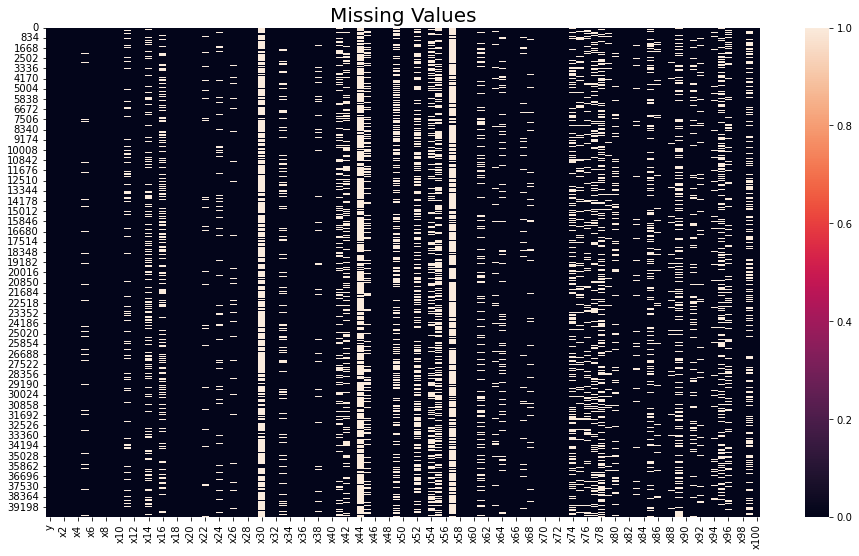

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())
plt.title('Missing Values',fontsize=20)
plt.show()

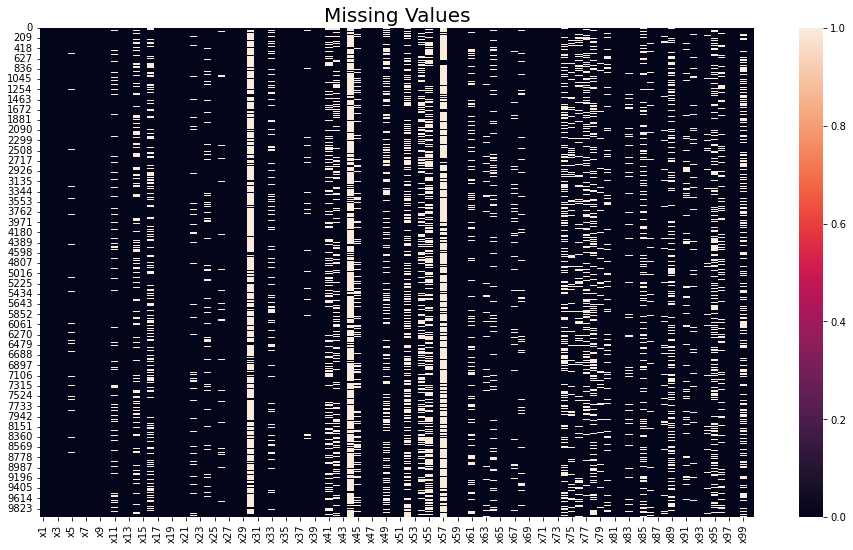

In [24]:
plt.figure(figsize=(16,9))
sns.heatmap(test.isnull())
plt.title('Missing Values',fontsize=20)
plt.show()

We can notice that there are huge missing data amount within both datasets which is nearly 10% of the amount of data. Since these missing values are distributed among most of the variables, we cannot drop them as we will lose huge amount of information. Therefore, we will use data imputation technique to handle the missing data.

### Missing Values Imputations

For this task, I usually use `KNNImputer` to handle missing values within the dataset using python. However, I will use external software "Orange3" for this task, since it provides easy and fast solution for data imputation using `KNNImputer`. Example of using `KNNImputer` in Python as follow:

In [25]:
# imputer = KNNImputer(n_neighbors=6)
# train ['x15'] = imputer.fit_transform (train[['x15']])

After missing data imputation in Orange3, we have imputed most of the missing values within our dataset (train and test). we will call the data again as a csv file.

In [26]:
train = pd.read_csv('new_imputed_train.csv')
test = pd.read_csv('new_imputed_test.csv')

In [27]:
train.head(10)

,x1,x2,x3,x4,x5,x6,x8,x7,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x19,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.220784,0.0062,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,7.328029,36.601967,-908.650758,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,0.111829,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,36.021919,5-10 miles,18.129499,98462.25463,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,2.370582,-1.532562,38.215036,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,-0.407838,2.591407,-1.544499,mercedes,51.287604,1,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,0.130546,10.255579,7.627730,0,yes,104.251338,0
1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,1.192441,0.0064,3.513950,1.419900,84.079367,1.459868,1.443983,0.639688,-1.165869,100.112121,8.487132,70.808566,6.796408,3.789176,-1864.962288,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,1.015460,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.10062,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,14.155663,3350.837875,1.995635,5.484466,73.964560,0.637917,3.477771,0.956001,29.348902,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,1,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,9.495807,10.505284,1,yes,101.230645,1
2,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,0.952323,-0.0008,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,-543.187403,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,0.677601,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.33950,0.869508,0.150728,1.095755,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,2.990240,4.127857,22.821119,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1,5.660882,-2.608974,-6.387984,2.506272,2.138771,93.696295,53.977291,0.657292,-0.353469,7.840726,3.997183,2.059615,0.305170,no,4.456565,1.059503,8.754572,7.810979,0,yes,109.345215,1
3,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.520756,-0.0057,1.825586,2.223038,96.420382,-1.390239,3.962961,0.719007,-2.046856,100.111968,6.611554,74.966925,7.728963,8.136213,-182.626381,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,-1.731614,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.09650,0.551268,-0.965711,1.115561,0.422522,-2.123048,41.857197,59.226119,12.942799,1961.609788,3.155214,1.790257,68.671023,-1.020225,5.833712,0.663759,36.203663,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,10.356533,2.933707,0.899392,5.971782,no,4.10002

In [28]:
test.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x19,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,4.747627,20.509439,Wednesday,2.299105,-1.815777,-0.752166,0.0098,-3.240309,0.587948,-0.260721,101.113628,-0.812035,3.251085,-0.004432,-0.917763,102.193597,7.097387,75.256714,8.269754,120.216190,4.794438,56.134458,-0.083641,female,5.740955,-3.152540,924.013304,17.697125,1.402273,-0.482423,no,1.461654,Florida,57.930285,4.727300,66.416594,28.450466,33.499310,5-10 miles,16.776061,99971.84470,0.492812,-0.963616,0.890745,0.318052,1.266416,53.020326,61.840284,10.614623,1825.413159,2.517924,-9.350060,70.880778,0.440163,1.923125,0.239009,41.237931,300.629990,0,May,5.461123,5.149473,1.179229,59.346822,progressive,2.219502,17.667792,5.557066,-2.030901,0.636111,-0.000234,62.363381,4.613878,2.415655,3.632041,-0.382482,mercedes,55.938387,1,8.325299,-1.274085,-5.663245,2.402660,-0.061040,106.883835,64.002500,0.548974,3.420875,11.553023,5.904644,1.343054,12.542333,no,3.107683,0.533904,12.438759,7.298306,0,yes,93.567120
1,1.148654,19.301465,Fri,1.862200,-0.773707,-1.461276,0.0076,0.443209,0.522113,-1.090886,104.791999,8.805876,1.651993,0.773853,-1.396065,99.356609,7.117930,79.061540,5.668347,-267.562586,12.377178,56.842709,0.321981,female,2.058123,-0.442525,1107.628399,15.747234,2.027073,0.771331,yes,0.608259,North Carolina,55.646392,0.789132,68.881807,32.242558,-1.034680,5-10 miles,11.959804,99910.55492,0.547935,1.001799,1.315020,3.229084,5.873890,49.116516,61.279131,9.360134,1818.390072,2.269700,0.336755,69.832156,2.666487,1.224195,-1.214940,30.636766,300.629990,0,July,6.520113,2.101449,-0.871509,54.414351,allstate,1.289800,14.402071,7.302161,-1.553879,1.352019,-0.000234,54.104054,9.010198,0.537178,1.489493,-1.106853,ford,44.322947,1,6.088895,1.878944,-8.237793,3.636347,3.726452,105.488589,53.387201,-0.751229,0.295234,6.212811,4.876645,-0.848567,7.213829,yes,4.276078,1.292015,10.386987,12.527094,1,yes,98.607486
2,4.986860,18.769675,Saturday,1.040845,-1.548690,2.632948,-0.0005,-1.167885,5.739275,0.222975,102.109546,7.831517,3.055358,2.036434,1.057296,99.979575,10.943217,87.567827,3.219583,-311.292903,31.135956,50.048638,1.174485,male,1.609278,-0.303259,1009.911508,12.008190,0.618778,0.557669,no,0.680923,California,53.178113,0.869321,70.249633,35.207243,48.980294,5-10 miles,14.564732,100729.38080,0.096947,-0.490053,1.106050,1.333292,0.750075,48.258898,63.737244,11.564194,1815.680559,1.704048,-1.558644,67.090400,1.547230,2.769925,1.428580,34.987579,300.629990,0,January,12.190433,1.793349,-0.114922,48.121885,progressive,-1.755707,14.402071,9.903803,1.720469,0.765756,-0.000234,51.522621,11.700359,-1.867170,0.383319,-1.078648,ford,48.854080,1,8.711055,-0.073306,-8.739095,5.294273,2.138771,95.095418,49.687134,2.641871,1.718243,8.594218,4.455432,1.143388,10.483928,no,2.090868,-1.780474,11.328177,11.628247,0,yes,94.578246
3,3.709183,18.374375,Tuesday,-0.169882,-2.396549,-0.784673,-0.0160,-2.662226,1.548050,0.210141,82.653354,0.436885,1.578106,0.705383,-1.287913,102.410965,6.588790,71.825782,7.459929,2229.149400,1.822459,88.144007,0.909556,female,8.864059,0.641209,841.889126,20.904196,0.725017,-1.489218,no,0.622849,Mississippi,50.311869,0.453211,65.253390,34.432292,52.756665,5-10 miles,18.503815,101476.77880,0.888038,-0.007376,-1.126059,1.129508,-0.455920,44.525657,60.008453,12.852088,2251.680231,2.915405,5.895661,75.219207,2.274407,2.769925,-0.415800,32.443595,300.629990,0,July,6.865209,5.083537,1.685063,46.761738,geico,-0.807993,14.402071,16.576216,0.033036,0.284538,-0.000234,54.625974,13.160347,-0.329204,2.171326,-0.109125,subaru,55.032204,1,11.742605,-0.253294,-6.641284,4.755348,2.138771,94.625278,52.445237,1.811825,0.461637,18.198978,3.947223,0.693646,3.86286

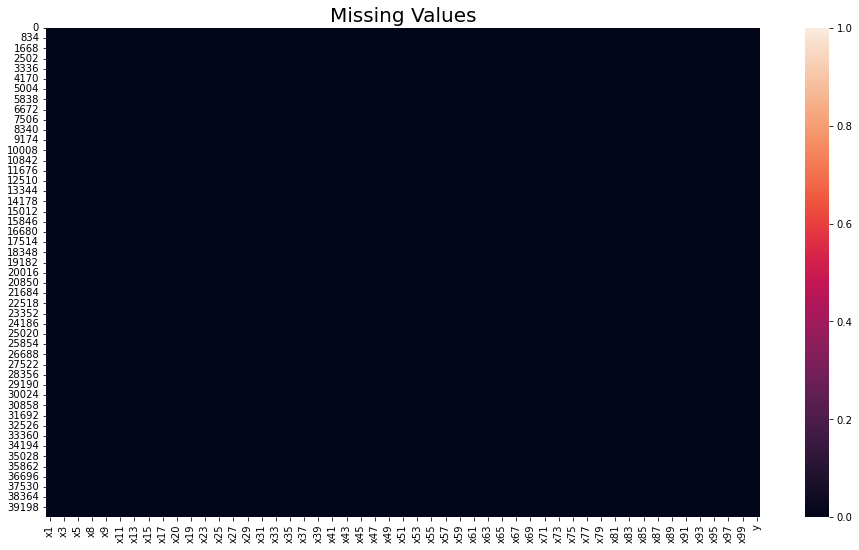

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())
plt.title('Missing Values',fontsize=20)
plt.show()

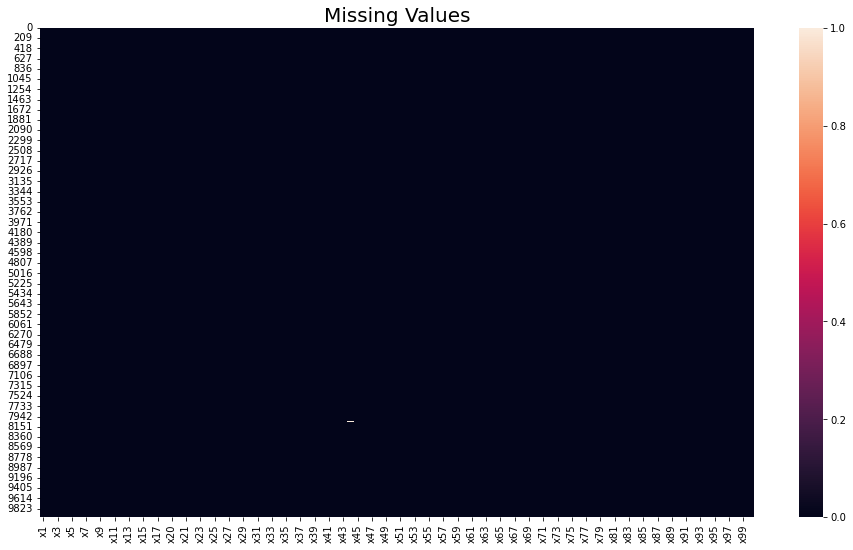

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(test.isnull())
plt.title('Missing Values',fontsize=20)
plt.show()

### Drop the remaining missing values

In [31]:
# Remove entire rows from dataframe if they contain any NaNs (Not a Number) in them or 'all'
# this may not be the best strategy for our dataset
train = train.dropna(how = 'any')
train.shape

(39789, 101)

In [32]:
# test = test.dropna(how = 'any')
# test.shape

### Handling syntax error within the dataset

As you can notice in feature x3, the day feature has two different format. In order to handle this problem, we need to handle the syntax errors in this attribute. 

In [33]:
# We need to understand what are tha values in column x3
train["x3"].unique()

array(['Wed', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Sat', 'Wednesday', 'Sun', 'Tue', 'Thur', 'Monday', 'Fri', 'Mon'],
      dtype=object)

In [34]:
# Handling the syntax error for the train dataset:
train["x3"].replace("Monday", "Mon", regex=True, inplace=True)
train["x3"].replace("Tuesday", "Tue", regex=True, inplace=True)
train["x3"].replace("Wednesday", "Wed", regex=True, inplace=True)
train["x3"].replace("Thursday", "Thur", regex=True, inplace=True)
train["x3"].replace("Friday", "Fri", regex=True, inplace=True)
train["x3"].replace("Saturday", "Sat", regex=True, inplace=True)
train["x3"].replace("Sunday", "Sun", regex=True, inplace=True)

train["x3"].unique()

array(['Wed', 'Fri', 'Thur', 'Tue', 'Sun', 'Sat', 'Mon'], dtype=object)

In [35]:
train.head()

,x1,x2,x3,x4,x5,x6,x8,x7,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x19,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.220784,0.0062,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,7.328029,36.601967,-908.650758,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,0.111829,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,36.021919,5-10 miles,18.129499,98462.25463,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,2.370582,-1.532562,38.215036,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,-0.407838,2.591407,-1.544499,mercedes,51.287604,1,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,0.130546,10.255579,7.627730,0,yes,104.251338,0
1,2.441471,18.416307,Fri,1.482586,0.920817,-0.759931,1.192441,0.0064,3.513950,1.419900,84.079367,1.459868,1.443983,0.639688,-1.165869,100.112121,8.487132,70.808566,6.796408,3.789176,-1864.962288,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,1.015460,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.10062,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,14.155663,3350.837875,1.995635,5.484466,73.964560,0.637917,3.477771,0.956001,29.348902,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,1,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,9.495807,10.505284,1,yes,101.230645,1
2,4.427278,19.188092,Thur,0.145652,0.366093,0.709962,0.952323,-0.0008,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,-543.187403,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,0.677601,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.33950,0.869508,0.150728,1.095755,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,2.990240,4.127857,22.821119,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1,5.660882,-2.608974,-6.387984,2.506272,2.138771,93.696295,53.977291,0.657292,-0.353469,7.840726,3.997183,2.059615,0.305170,no,4.456565,1.059503,8.754572,7.810979,0,yes,109.345215,1
3,3.925235,19.901257,Tue,1.763602,-0.251926,-0.827461,-0.520756,-0.0057,1.825586,2.223038,96.420382,-1.390239,3.962961,0.719007,-2.046856,100.111968,6.611554,74.966925,7.728963,8.136213,-182.626381,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,-1.731614,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.09650,0.551268,-0.965711,1.115561,0.422522,-2.123048,41.857197,59.226119,12.942799,1961.609788,3.155214,1.790257,68.671023,-1.020225,5.833712,0.663759,36.203663,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,10.356533,2.933707,0.899392,5.971782,no,4.100022,1.151085,

In [36]:
# Handling the syntax error for the train dataset:
test["x3"].replace("Monday", "Mon", regex=True, inplace=True)
test["x3"].replace("Tuesday", "Tue", regex=True, inplace=True)
test["x3"].replace("Wednesday", "Wed", regex=True, inplace=True)
test["x3"].replace("Thursday", "Thur", regex=True, inplace=True)
test["x3"].replace("Friday", "Fri", regex=True, inplace=True)
test["x3"].replace("Saturday", "Sat", regex=True, inplace=True)
test["x3"].replace("Sunday", "Sun", regex=True, inplace=True)

test["x3"].unique()

array(['Wed', 'Fri', 'Sat', 'Tue', 'Mon', 'Sun', 'Thur'], dtype=object)

In [37]:
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x19,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,4.747627,20.509439,Wed,2.299105,-1.815777,-0.752166,0.0098,-3.240309,0.587948,-0.260721,101.113628,-0.812035,3.251085,-0.004432,-0.917763,102.193597,7.097387,75.256714,8.269754,120.216190,4.794438,56.134458,-0.083641,female,5.740955,-3.152540,924.013304,17.697125,1.402273,-0.482423,no,1.461654,Florida,57.930285,4.727300,66.416594,28.450466,33.499310,5-10 miles,16.776061,99971.84470,0.492812,-0.963616,0.890745,0.318052,1.266416,53.020326,61.840284,10.614623,1825.413159,2.517924,-9.350060,70.880778,0.440163,1.923125,0.239009,41.237931,300.62999,0,May,5.461123,5.149473,1.179229,59.346822,progressive,2.219502,17.667792,5.557066,-2.030901,0.636111,-0.000234,62.363381,4.613878,2.415655,3.632041,-0.382482,mercedes,55.938387,1,8.325299,-1.274085,-5.663245,2.402660,-0.061040,106.883835,64.002500,0.548974,3.420875,11.553023,5.904644,1.343054,12.542333,no,3.107683,0.533904,12.438759,7.298306,0,yes,93.567120
1,1.148654,19.301465,Fri,1.862200,-0.773707,-1.461276,0.0076,0.443209,0.522113,-1.090886,104.791999,8.805876,1.651993,0.773853,-1.396065,99.356609,7.117930,79.061540,5.668347,-267.562586,12.377178,56.842709,0.321981,female,2.058123,-0.442525,1107.628399,15.747234,2.027073,0.771331,yes,0.608259,North Carolina,55.646392,0.789132,68.881807,32.242558,-1.034680,5-10 miles,11.959804,99910.55492,0.547935,1.001799,1.315020,3.229084,5.873890,49.116516,61.279131,9.360134,1818.390072,2.269700,0.336755,69.832156,2.666487,1.224195,-1.214940,30.636766,300.62999,0,July,6.520113,2.101449,-0.871509,54.414351,allstate,1.289800,14.402071,7.302161,-1.553879,1.352019,-0.000234,54.104054,9.010198,0.537178,1.489493,-1.106853,ford,44.322947,1,6.088895,1.878944,-8.237793,3.636347,3.726452,105.488589,53.387201,-0.751229,0.295234,6.212811,4.876645,-0.848567,7.213829,yes,4.276078,1.292015,10.386987,12.527094,1,yes,98.607486
2,4.986860,18.769675,Sat,1.040845,-1.548690,2.632948,-0.0005,-1.167885,5.739275,0.222975,102.109546,7.831517,3.055358,2.036434,1.057296,99.979575,10.943217,87.567827,3.219583,-311.292903,31.135956,50.048638,1.174485,male,1.609278,-0.303259,1009.911508,12.008190,0.618778,0.557669,no,0.680923,California,53.178113,0.869321,70.249633,35.207243,48.980294,5-10 miles,14.564732,100729.38080,0.096947,-0.490053,1.106050,1.333292,0.750075,48.258898,63.737244,11.564194,1815.680559,1.704048,-1.558644,67.090400,1.547230,2.769925,1.428580,34.987579,300.62999,0,January,12.190433,1.793349,-0.114922,48.121885,progressive,-1.755707,14.402071,9.903803,1.720469,0.765756,-0.000234,51.522621,11.700359,-1.867170,0.383319,-1.078648,ford,48.854080,1,8.711055,-0.073306,-8.739095,5.294273,2.138771,95.095418,49.687134,2.641871,1.718243,8.594218,4.455432,1.143388,10.483928,no,2.090868,-1.780474,11.328177,11.628247,0,yes,94.578246
3,3.709183,18.374375,Tue,-0.169882,-2.396549,-0.784673,-0.0160,-2.662226,1.548050,0.210141,82.653354,0.436885,1.578106,0.705383,-1.287913,102.410965,6.588790,71.825782,7.459929,2229.149400,1.822459,88.144007,0.909556,female,8.864059,0.641209,841.889126,20.904196,0.725017,-1.489218,no,0.622849,Mississippi,50.311869,0.453211,65.253390,34.432292,52.756665,5-10 miles,18.503815,101476.77880,0.888038,-0.007376,-1.126059,1.129508,-0.455920,44.525657,60.008453,12.852088,2251.680231,2.915405,5.895661,75.219207,2.274407,2.769925,-0.415800,32.443595,300.62999,0,July,6.865209,5.083537,1.685063,46.761738,geico,-0.807993,14.402071,16.576216,0.033036,0.284538,-0.000234,54.625974,13.160347,-0.329204,2.171326,-0.109125,subaru,55.032204,1,11.742605,-0.253294,-6.641284,4.755348,2.138771,94.625278,52.445237,1.811825,0.461637,18.198978,3.947223,0.693646,3.862867,no,2.643847,1.662

### Check Duplicates

We need to check if there are any duplicates within our values and we must delete them since they add no extra value to the learning process.

In [38]:
duplicated = train.duplicated()
print(duplicated.sum())

0


In [39]:
duplicated = test.duplicated()
print(duplicated.sum())

0


Luckily, we have no duplicates values in both datasets.

### Label Encoding

* Label Encoding refers to the convertion of the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.


* In simple terms, taking all the categorical values & transforming them into some numerical values.

Using `LabelEncoder function`: We will use this method as the two features that we need to encode do not have missing values, so that do not fill the missing values. All the values in the below cell are categorical features, we will therefore convert them into numerical features.

In [40]:
print(train["x3"].dtypes)
print(train["x24"].dtypes)
print(train["x31"].dtypes)
print(train["x33"].dtypes)
print(train["x39"].dtypes)
print(train["x60"].dtypes)
print(train["x65"].dtypes)
print(train["x77"].dtypes)
print(train["x93"].dtypes)
print(train["x99"].dtypes)

object
object
object
object
object
object
object
object
object
object


In [41]:
# To convert the categorical values in the train dataset

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train["x3"] = encoder.fit_transform(train["x3"])
train["x24"] = encoder.fit_transform(train["x24"])
train["x31"] = encoder.fit_transform(train["x31"])
train["x33"] = encoder.fit_transform(train["x33"])
train["x39"] = encoder.fit_transform(train["x39"])
train["x60"] = encoder.fit_transform(train["x60"])
train["x65"] = encoder.fit_transform(train["x65"])
train["x77"] = encoder.fit_transform(train["x77"])
train["x93"] = encoder.fit_transform(train["x93"])
train["x99"] = encoder.fit_transform(train["x99"])

In [42]:
print(train["x3"].unique())
print(train["x24"].unique())
print(train["x31"].unique())
print(train["x33"].unique())
print(train["x39"].unique())
print(train["x60"].unique())
print(train["x65"].unique())
print(train["x77"].unique())
print(train["x93"].unique())
print(train["x99"].unique())

[6 0 4 5 3 2 1]
[0 1]
[0 1]
[ 5 42 43 23 32  9 27  4 34  2  0 35 38 15 14 45  3 21 13 10 48  6 46 33
 26 31 29 22  7 47 18 17 44 25 37 36 28 49 30 20 19  1 12 50 39 41 24 16
  8 11 40]
[0]
[ 1  0 11  4  2  7  5  9  6  3 10  8]
[2 0 3 4 1]
[3 5 4 6 2 1 0]
[0 1]
[0]


In [43]:
train.head()

,x1,x2,x3,x4,x5,x6,x8,x7,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x19,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.165254,18.060003,6,1.077380,-1.339233,-1.584341,0.220784,0.0062,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,7.328029,36.601967,-908.650758,126.384294,1.264713,0,3.834082,2.352406,905.491445,14.779467,0.752524,0.111829,0,-0.597288,5,46.667221,3.159002,69.444841,32.450076,36.021919,0,18.129499,98462.25463,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,2.370582,-1.532562,38.215036,300.629990,0,1,9.840873,6.600008,1.252479,46.992716,2,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,-0.407838,2.591407,-1.544499,3,51.287604,1,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,0,5.492487,0.130546,10.255579,7.627730,0,0,104.251338,0
1,2.441471,18.416307,0,1.482586,0.920817,-0.759931,1.192441,0.0064,3.513950,1.419900,84.079367,1.459868,1.443983,0.639688,-1.165869,100.112121,8.487132,70.808566,6.796408,3.789176,-1864.962288,93.037021,0.346201,1,4.345028,1.651579,868.784447,25.914680,1.445294,1.015460,0,1.127376,42,47.928569,-1.013712,61.289132,35.521824,31.526217,0,11.389081,99074.10062,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,14.155663,3350.837875,1.995635,5.484466,73.964560,0.637917,3.477771,0.956001,29.348902,300.629990,0,0,6.939395,3.864254,0.057936,48.216622,0,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,3,42.918352,1,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,0,3.346429,4.321172,9.495807,10.505284,1,0,101.230645,1
2,4.427278,19.188092,4,0.145652,0.366093,0.709962,0.952323,-0.0008,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,-543.187403,71.022413,0.070968,1,4.332644,-0.375737,1077.233497,13.177479,4.174536,0.677601,0,2.605279,43,56.674425,0.108486,69.798923,30.684074,31.049447,0,14.372443,100087.33950,0.869508,0.150728,1.095755,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,2.990240,4.127857,22.821119,182.369349,0,11,6.228138,1.370661,-0.239705,54.120933,3,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,5,55.020333,1,5.660882,-2.608974,-6.387984,2.506272,2.138771,93.696295,53.977291,0.657292,-0.353469,7.840726,3.997183,2.059615,0.305170,0,4.456565,1.059503,8.754572,7.810979,0,0,109.345215,1
3,3.925235,19.901257,5,1.763602,-0.251926,-0.827461,-0.520756,-0.0057,1.825586,2.223038,96.420382,-1.390239,3.962961,0.719007,-2.046856,100.111968,6.611554,74.966925,7.728963,8.136213,-182.626381,121.610846,0.700954,1,7.294990,-0.603983,1051.655489,17.006528,2.347355,-1.731614,0,1.071202,23,59.154933,1.319711,65.408246,34.401290,48.363690,0,13.191173,100934.09650,0.551268,-0.965711,1.115561,0.422522,-2.123048,41.857197,59.226119,12.942799,1961.609788,3.155214,1.790257,68.671023,-1.020225,5.833712,0.663759,36.203663,300.629990,0,11,6.005140,0.013162,0.318335,54.784192,3,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,4,47.769343,1,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,10.356533,2.933707,0.899392,5.971782,0,4.100022,1.151085,9.701337,9.178325,1,0,103.021970,0
4,2.868802,22.202473,3,3.405119,0.083162,1.381504,-0.732739,0.0109,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.2015

To repeat the same process for the test dataset

In [44]:
print(test["x3"].dtypes)
print(test["x24"].dtypes)
print(test["x31"].dtypes)
print(test["x33"].dtypes)
print(test["x39"].dtypes)
print(test["x60"].dtypes)
print(test["x65"].dtypes)
print(test["x77"].dtypes)
print(test["x93"].dtypes)
print(test["x99"].dtypes)

object
object
object
object
object
object
object
object
object
object


In [45]:
# To convert the categorical values in the train dataset

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test["x3"] = encoder.fit_transform(test["x3"])
test["x24"] = encoder.fit_transform(test["x24"])
test["x31"] = encoder.fit_transform(test["x31"])
test["x33"] = encoder.fit_transform(test["x33"])
test["x39"] = encoder.fit_transform(test["x39"])
test["x60"] = encoder.fit_transform(test["x60"])
test["x65"] = encoder.fit_transform(test["x65"])
test["x77"] = encoder.fit_transform(test["x77"])
test["x93"] = encoder.fit_transform(test["x93"])
test["x99"] = encoder.fit_transform(test["x99"])

In [46]:
print(test["x3"].unique())
print(test["x24"].unique())
print(test["x31"].unique())
print(test["x33"].unique())
print(test["x39"].unique())
print(test["x60"].unique())
print(test["x65"].unique())
print(test["x77"].unique())
print(test["x93"].unique())
print(test["x99"].unique())

[6 0 2 5 1 3 4]
[0 1]
[0 1]
[ 9 33  4 24 10 43 48 35 14 20 17 46 13 16 19  0 18 32 47 22 21 36 44 38
 49  5 30 40 23 15 50 42  3 28 25 12 39 26  2 29 11 37 41 34  6  8  7 31
 27 45  1]
[0]
[ 8  5  4  1 10  2 11  3  6  9  0  7]
[4 0 3 1 2]
[3 2 5 1 6 4 0]
[0 1]
[0]


In [47]:
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x19,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,4.747627,20.509439,6,2.299105,-1.815777,-0.752166,0.0098,-3.240309,0.587948,-0.260721,101.113628,-0.812035,3.251085,-0.004432,-0.917763,102.193597,7.097387,75.256714,8.269754,120.216190,4.794438,56.134458,-0.083641,0,5.740955,-3.152540,924.013304,17.697125,1.402273,-0.482423,0,1.461654,9,57.930285,4.727300,66.416594,28.450466,33.499310,0,16.776061,99971.84470,0.492812,-0.963616,0.890745,0.318052,1.266416,53.020326,61.840284,10.614623,1825.413159,2.517924,-9.350060,70.880778,0.440163,1.923125,0.239009,41.237931,300.62999,0,8,5.461123,5.149473,1.179229,59.346822,4,2.219502,17.667792,5.557066,-2.030901,0.636111,-0.000234,62.363381,4.613878,2.415655,3.632041,-0.382482,3,55.938387,1,8.325299,-1.274085,-5.663245,2.402660,-0.061040,106.883835,64.002500,0.548974,3.420875,11.553023,5.904644,1.343054,12.542333,0,3.107683,0.533904,12.438759,7.298306,0,0,93.567120
1,1.148654,19.301465,0,1.862200,-0.773707,-1.461276,0.0076,0.443209,0.522113,-1.090886,104.791999,8.805876,1.651993,0.773853,-1.396065,99.356609,7.117930,79.061540,5.668347,-267.562586,12.377178,56.842709,0.321981,0,2.058123,-0.442525,1107.628399,15.747234,2.027073,0.771331,1,0.608259,33,55.646392,0.789132,68.881807,32.242558,-1.034680,0,11.959804,99910.55492,0.547935,1.001799,1.315020,3.229084,5.873890,49.116516,61.279131,9.360134,1818.390072,2.269700,0.336755,69.832156,2.666487,1.224195,-1.214940,30.636766,300.62999,0,5,6.520113,2.101449,-0.871509,54.414351,0,1.289800,14.402071,7.302161,-1.553879,1.352019,-0.000234,54.104054,9.010198,0.537178,1.489493,-1.106853,2,44.322947,1,6.088895,1.878944,-8.237793,3.636347,3.726452,105.488589,53.387201,-0.751229,0.295234,6.212811,4.876645,-0.848567,7.213829,1,4.276078,1.292015,10.386987,12.527094,1,0,98.607486
2,4.986860,18.769675,2,1.040845,-1.548690,2.632948,-0.0005,-1.167885,5.739275,0.222975,102.109546,7.831517,3.055358,2.036434,1.057296,99.979575,10.943217,87.567827,3.219583,-311.292903,31.135956,50.048638,1.174485,1,1.609278,-0.303259,1009.911508,12.008190,0.618778,0.557669,0,0.680923,4,53.178113,0.869321,70.249633,35.207243,48.980294,0,14.564732,100729.38080,0.096947,-0.490053,1.106050,1.333292,0.750075,48.258898,63.737244,11.564194,1815.680559,1.704048,-1.558644,67.090400,1.547230,2.769925,1.428580,34.987579,300.62999,0,4,12.190433,1.793349,-0.114922,48.121885,4,-1.755707,14.402071,9.903803,1.720469,0.765756,-0.000234,51.522621,11.700359,-1.867170,0.383319,-1.078648,2,48.854080,1,8.711055,-0.073306,-8.739095,5.294273,2.138771,95.095418,49.687134,2.641871,1.718243,8.594218,4.455432,1.143388,10.483928,0,2.090868,-1.780474,11.328177,11.628247,0,0,94.578246
3,3.709183,18.374375,5,-0.169882,-2.396549,-0.784673,-0.0160,-2.662226,1.548050,0.210141,82.653354,0.436885,1.578106,0.705383,-1.287913,102.410965,6.588790,71.825782,7.459929,2229.149400,1.822459,88.144007,0.909556,0,8.864059,0.641209,841.889126,20.904196,0.725017,-1.489218,0,0.622849,24,50.311869,0.453211,65.253390,34.432292,52.756665,0,18.503815,101476.77880,0.888038,-0.007376,-1.126059,1.129508,-0.455920,44.525657,60.008453,12.852088,2251.680231,2.915405,5.895661,75.219207,2.274407,2.769925,-0.415800,32.443595,300.62999,0,5,6.865209,5.083537,1.685063,46.761738,3,-0.807993,14.402071,16.576216,0.033036,0.284538,-0.000234,54.625974,13.160347,-0.329204,2.171326,-0.109125,5,55.032204,1,11.742605,-0.253294,-6.641284,4.755348,2.138771,94.625278,52.445237,1.811825,0.461637,18.198978,3.947223,0.693646,3.862867,0,2.643847,1.662240,10.064961,10.550014,1,0,100.346261
4,3.801616,20.205541,1,2.092652,-0.732784,-0.703101,0.0186,0.056422,2.878167,-0.457618,75.036421,8.034303,1.631426,0.643738,0.349166,101.5

* Hence, we have only numerical values in our data where these categories are given some specific numerical values if it is unique. Therefore we have successfully encoded categorical columns into numerical values which is an important data preprocessing step.



### Save Cleaned Data

In [48]:
# # In case we need to save the data after handling the missing data by imputation.
# train.to_csv('Cleaned_train_data.csv', index=False) #index = False used to tell Pandas that this index is not a feature.
# test.to_csv('Cleaned_test_data.csv', index=False) #index = False used to tell Pandas that this index is not a feature.

## Features Engineering

### Split the Dataset

In [49]:
X_train = train.drop(columns=['y'])
Y_train = train['y']

### Class Balancing Using `SMOTE`

As we can see below, there is no balance in the class (target) in the training dataset. Therefore, we need to use oversampling techniques which is SMOTE to balance the class in our dataset.

In [14]:
# To find the count of each value in the target (Option 1)
train['y'].value_counts()

0    34197
1     5803
Name: y, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(k_neighbors=5, random_state=42)
X_smote, Y_smote = sm.fit_resample(X_train, Y_train)
import collections
print("change is value of count after using smote:", collections.Counter(Y_smote))

change is value of count after using smote: Counter({0: 34010, 1: 34010})


In [52]:
print(X_smote.shape)
print(Y_smote.shape)

(68020, 100)
(68020,)


### Data Standardisation

We will apply feature scalling into the train dataset to get the values in the same range.

In [53]:
from sklearn.preprocessing import StandardScaler

# To scale the data using StandardScalar function.
scaler = StandardScaler()
scaler.fit(X_smote)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_smote)

#view the scaled features
print(X_train)

[[-1.55107125 -1.31218491  1.60106385 ... -0.79353007  0.
   0.85751219]
 [-0.31457932 -1.07303231 -1.47005301 ...  1.26019169  0.
   0.24081574]
 [ 0.76415541 -0.55500727  0.57735823 ... -0.79353007  0.
   1.89746425]
 ...
 [ 1.78897682  0.23973055 -1.47005301 ... -0.79353007  0.
  -0.7489787 ]
 [-0.35749821 -0.11409092  0.57735823 ... -0.79353007  0.
   0.4881345 ]
 [-1.18716125  1.33716318 -0.44634739 ... -0.79353007  0.
  -1.07269661]]


We will apply feature scalling into the test dataset.

In [54]:
# To scale the data using StandardScalar function.
scaler = StandardScaler()
scaler.fit(test)

# Apply transform to both the training set and the test set.
X_test = scaler.transform(test)

#view the scaled features
print(X_test)

[[ 0.89345294  0.31646643  1.37852529 ... -0.99223018  0.
  -1.20235916]
 [-0.88999144 -0.43838161 -1.47654952 ...  1.00783066  0.
  -0.25174303]
 [ 1.01200308 -0.77069062 -0.52485792 ... -0.99223018  0.
  -1.01166017]
 ...
 [ 1.95628028 -2.04771353 -0.52485792 ... -0.99223018  0.
   0.04643493]
 [-0.84695803  0.92903568 -0.04901212 ...  1.00783066  0.
  -0.40814009]
 [ 0.01368695  0.30150975 -0.04901212 ... -0.99223018  0.
  -0.30828643]]


### Dimensionality Reduction Using Principal Component Analysis (PCA)

In [55]:
# Proceed to perform PCA

from sklearn.decomposition import PCA # dimensionality reduction
pca = PCA()
X_train = pca.fit_transform(X_train)

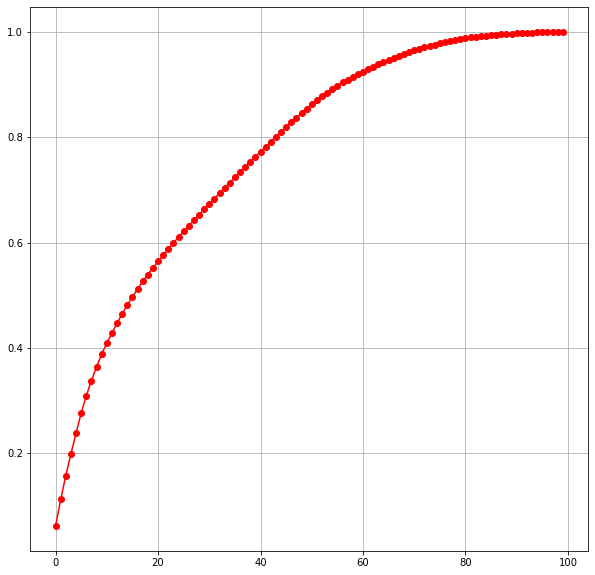

In [56]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

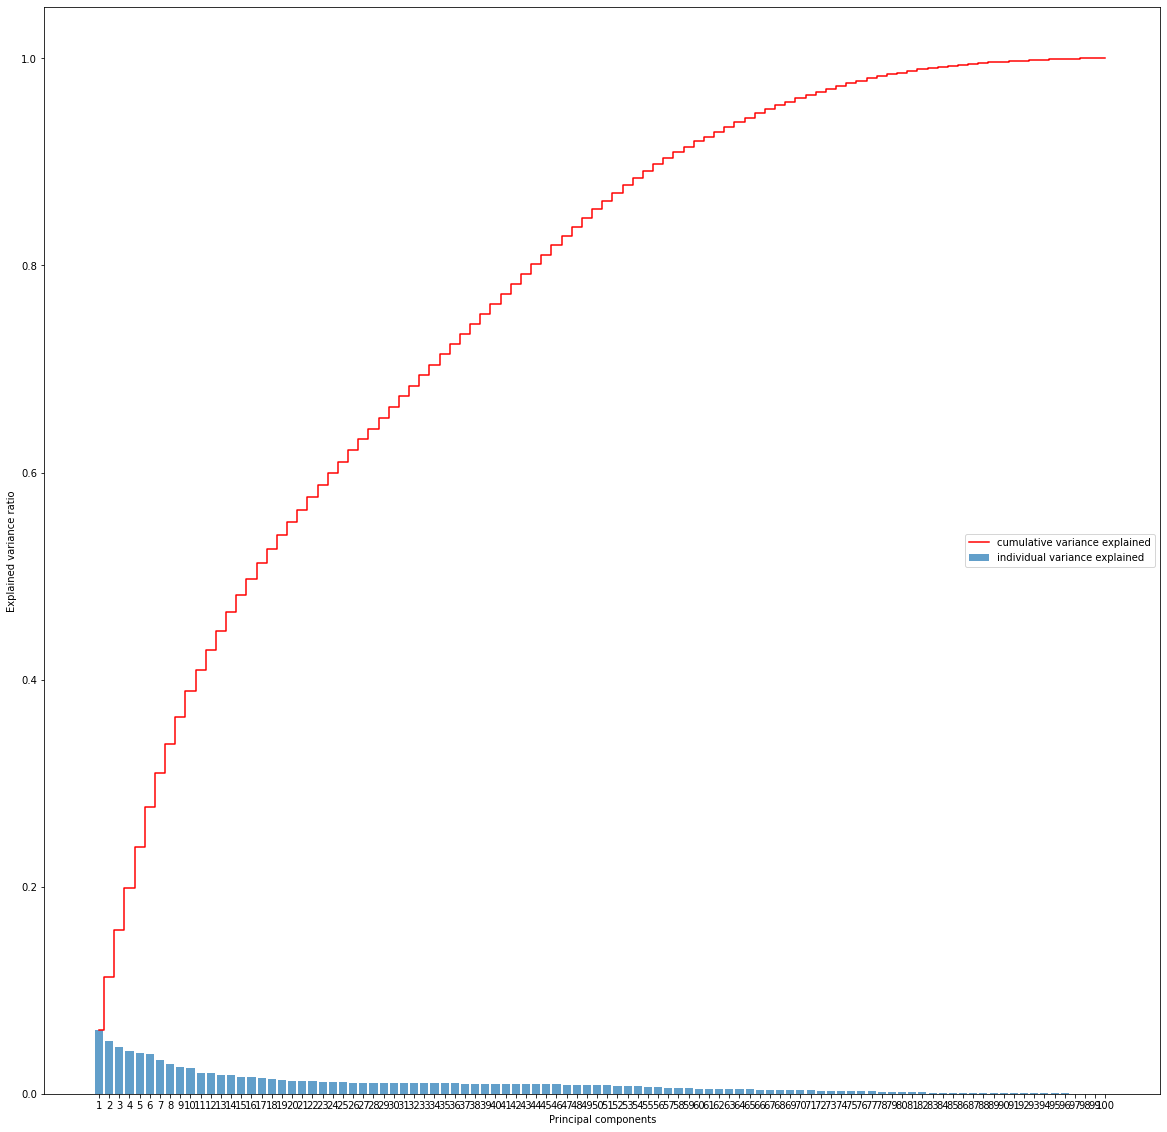

In [57]:
# Explaining the cumulative explained variance in details

pca = PCA()
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(20,20))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

We can see that about 80 of the features are contributing into 97% of the learning outcomes.

In [58]:
# we can pick the first 80 features for our prediction, but we will keep all the variables for now. 
# In case there are many variables to choose from we can pick the principle components.
pca_new = PCA(n_components=100)
X_train = pca_new.fit_transform(X_train)

### Split-out into Train, Validation set

In [59]:
# We need to create a validation dataset to validate the model before apply testing dataset.

from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_smote, test_size=0.15, random_state=42, shuffle = True) 

In [60]:
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in valid dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')
print("\n")
print(f'Total # of target in train dataset: {len(Y_train)}')
print(f'Total # of target in valid dataset: {len(Y_valid)}')

Total # of sample in train dataset: 57817
Total # of sample in valid dataset: 10203
Total # of sample in test dataset: 10000


Total # of target in train dataset: 57817
Total # of target in valid dataset: 10203


In [61]:
Y_valid.value_counts()

1    5153
0    5050
Name: y, dtype: int64

### Write out Clean data

In [62]:
# pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
# pd.DataFrame(X_test).to_csv("X_test.csv", index=False)

# pd.DataFrame(X_valid).to_csv("X_valid.csv", index=False)
# pd.DataFrame(Y_valid).to_csv("Y_valid.csv", index=False)

# pd.DataFrame(X_test).to_csv("X_test.csv", index=False)

## Models Training & Performance Evaluation (Supervised Learning)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

### Initial Algorithms Comparison

We need to decide which algorithm to select alongside with LR. Hence, we need to test the performance of each of the selected algorithms on the training data and select the one with the highest performance (accuracy)

In [65]:
# To train the models all together.

models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier' : ExtraTreeClassifier(),
    'BaggingTreeClassifier' : BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'adaptiveBoostingClassifier' : AdaBoostClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorClassifier': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'MultilayerPerceptronClassifier' : MLPClassifier(),
    'LinearDiscriminantAnalysis' : LinearDiscriminantAnalysis()
}

# To evaluate the predictions outcomes

for m in models:
  model = models[m]
  model.fit(X_train, Y_train.values.ravel())
  score = model.score(X_valid, Y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, Y_train)
  print(f'Train accuracy score of trained model: {train_score*100}')

  validation_score = model.score(X_valid, Y_valid)
  print(f'Validation accuracy score of trained model: {validation_score*100}')
  print(" ")


LogisticRegression
Train accuracy score of trained model: 77.39073282944463
Validation accuracy score of trained model: 76.94795648338723
 
DecisionTreeClassifier
Train accuracy score of trained model: 100.0
Validation accuracy score of trained model: 74.70351857296873
 
ExtraTreeClassifier
Train accuracy score of trained model: 100.0
Validation accuracy score of trained model: 72.65510144075272
 
BaggingTreeClassifier
Train accuracy score of trained model: 99.25108532092636
Validation accuracy score of trained model: 83.31863177496814
 
GradientBoostingClassifier
Train accuracy score of trained model: 81.61959285331304
Validation accuracy score of trained model: 79.97647750661571
 
adaptiveBoostingClassifier
Train accuracy score of trained model: 78.57204628396492
Validation accuracy score of trained model: 78.08487699696168
 


/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
Train accuracy score of trained model: 96.39552380787657
Validation accuracy score of trained model: 87.76830344016466
 
RandomForestClassifier
Train accuracy score of trained model: 100.0
Validation accuracy score of trained model: 89.33646966578456
 
SupportVectorClassifier
Train accuracy score of trained model: 94.76105643668818
Validation accuracy score of trained model: 90.15975693423502
 
KNeighborsClassifier
Train accuracy score of trained model: 61.267447290589274
Validation accuracy score of trained model: 57.257669312947165
 
GaussianNB
Train accuracy score of trained model: 77.94420326201636
Validation accuracy score of trained model: 77.575222973635

/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MultilayerPerceptronClassifier
Train accuracy score of trained model: 97.92967466316136
Validation accuracy score of trained model: 87.27825149465843
 
LinearDiscriminantAnalysis
Train accuracy score of trained model: 77.19701817804452
Validation accuracy score of trained model: 76.75193570518475
 


### Algorithms Performance Results

After running the abovementioned algorithms, we came to the realisation that:

1. Random Forest Classifier hass the best initial performing Model. This is based on the  accuracy trade-off between train and test data.

2. For better performance we need hyper-parameter tuning and then select the optimal model.

## Models Optimisation / Hyper-parameters Tuning (Supervised Learning)

In [66]:
# Import the TPOT Library
from tpot import TPOTClassifier

/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [67]:
from time import time

def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

### 1. Logistic Regression

Hyper-parameter Tuning for LogisticRegressionClassifier

In [68]:
parameters = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             }

LR_classifier = TPOTClassifier(generations= 4, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.linear_model.LogisticRegression': parameters}, 
                                 cv = 10, scoring = 'accuracy')

start = time()
LR_classifier.fit(X_train, Y_train.values.ravel()) 
end = time()

Optimization Progress:   0%|          | 0/72 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7731464300777526

Generation 2 - Current best internal CV score: 0.7731464300777526

Generation 3 - Current best internal CV score: 0.7731464300777526

Generation 4 - Current best internal CV score: 0.7731464300777526

Best pipeline: LogisticRegression(LogisticRegression(input_matrix, C=0.001), C=1)


In [69]:
LR_training_time = (end - start)
print (LR_training_time, "Seconds")
convert (LR_training_time)

528.1362643241882 Seconds


'0:08:48'

In [70]:
valid_accuracy = LR_classifier.score(X_valid, Y_valid)
print(valid_accuracy)

0.7712437518376948


#### Display some results of the predictions for LR

Since there is no label in the test dataset, we will create the confusion matrix based on the validation dataset.

In [71]:
train_score_LR_classifier = LR_classifier.score(X_train, Y_train)
print(f'Train score of trained model: {train_score_LR_classifier}')

validation_score_LR_classifier = LR_classifier.score(X_valid, Y_valid)
print(f'Validation score of trained model: {validation_score_LR_classifier}')

y_predictions_LR_classifier = LR_classifier.predict(X_valid)

conf_matrix_LR_classifier = confusion_matrix(y_predictions_LR_classifier, Y_valid)


print(f'Accuracy: {accuracy_score(y_predictions_LR_classifier, Y_valid)*100}')
print()
print(f'Confussion matrix dtree: \n{conf_matrix_LR_classifier}\n')

Train score of trained model: 0.7739073282944463
Validation score of trained model: 0.7712437518376948
Accuracy: 77.12437518376947

Confussion matrix dtree: 
[[3806 1090]
 [1244 4063]]



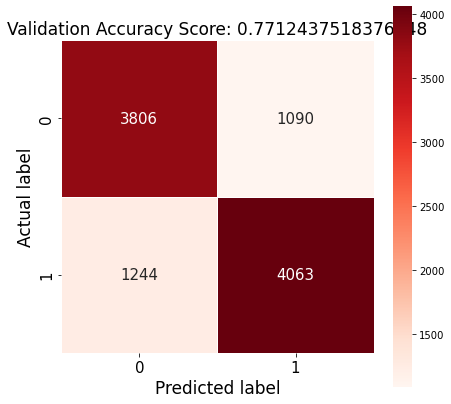

In [72]:
# To visualise the confusion matrix for DecisionTreeClassifier

plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix_LR_classifier, annot=True,
            fmt=".0f",
            annot_kws={"size": 15},
            linewidths=.5,
            square = True,
            cmap = 'Reds');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Validation Accuracy Score: {}'.format(validation_score_LR_classifier), size = 17);
plt.tick_params(labelsize= 15)

In [73]:
# To provide a report of the performance measures outcomes.

print(classification_report(y_predictions_LR_classifier, Y_valid, digits=4))

              precision    recall  f1-score   support

           0     0.7537    0.7774    0.7653      4896
           1     0.7885    0.7656    0.7769      5307

    accuracy                         0.7712     10203
   macro avg     0.7711    0.7715    0.7711     10203
weighted avg     0.7718    0.7712    0.7713     10203



In [97]:
# Predict for Multiple Observations at Once
LR_predictions = LR_classifier.predict_proba(X_test[0:])

Imputing missing values in feature set


In [98]:
LR_prediction = pd.DataFrame(LR_predictions)

In [99]:
LR_prediction.value_counts()

0         1       
0.002989  0.997011    1
0.739255  0.260745    1
0.738615  0.261385    1
0.738638  0.261362    1
0.738817  0.261183    1
                     ..
0.343539  0.656461    1
0.343562  0.656438    1
0.343650  0.656350    1
0.343754  0.656246    1
0.997498  0.002502    1
Length: 10000, dtype: int64

In [104]:
LR_prediction.to_csv('glmresults.csv', index=False)

Imputing missing values in feature set


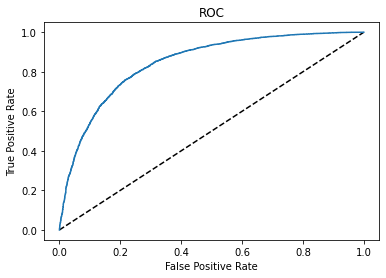

In [107]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
LR_y_pred_prob = LR_classifier.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = roc_curve(Y_valid, LR_y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [108]:
# calculate AUC
AUC = roc_auc_score(Y_valid, LR_y_pred_prob)
print('AUC: %.4f' % AUC)

AUC: 0.8459


### 2. Random Forests

Hyper-parameter Tuning for RandomForestClassifier

In [79]:
parameters = {'criterion': ['entropy', 'gini'],
              'min_samples_leaf': range (2, 5),
              'n_estimators': [10, 50]
             }

RF_classifier = TPOTClassifier(generations= 4, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 5, scoring = 'accuracy')

start = time()
RF_classifier.fit(X_train, Y_train.values.ravel())
end = time()

Optimization Progress:   0%|          | 0/72 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8740508952310435

Generation 2 - Current best internal CV score: 0.8743275906615745

Generation 3 - Current best internal CV score: 0.8756420880267524

Generation 4 - Current best internal CV score: 0.8780808177229383

Best pipeline: RandomForestClassifier(RandomForestClassifier(CombineDFs(input_matrix, RandomForestClassifier(input_matrix, criterion=gini, min_samples_leaf=2, n_estimators=50)), criterion=gini, min_samples_leaf=4, n_estimators=50), criterion=entropy, min_samples_leaf=2, n_estimators=10)


In [80]:
RF_training_time = (end - start)
print (RF_training_time)
convert (RF_training_time)

9062.196198940277


'2:31:02'

In [81]:
validation_accuracy = RF_classifier.score(X_valid, Y_valid)
print(validation_accuracy)

0.884641772027835


In [82]:
train_score_RF_classifier = RF_classifier.score(X_train, Y_train)
print(f'Train score of trained model: {train_score_RF_classifier}')

validation_score_RF_classifier = RF_classifier.score(X_valid, Y_valid)
print(f'Validation score of trained model: {validation_score_RF_classifier}')

y_predictions_RF_classifier = RF_classifier.predict(X_valid)

conf_matrix_RF_classifier = confusion_matrix(y_predictions_RF_classifier, Y_valid)


print(f'Accuracy: {accuracy_score(y_predictions_RF_classifier, Y_valid)*100}')
print()
print(f'Confussion matrix dtree: \n{conf_matrix_RF_classifier}\n')

Train score of trained model: 0.9999654080979643
Validation score of trained model: 0.884641772027835
Accuracy: 88.4641772027835

Confussion matrix dtree: 
[[4508  635]
 [ 542 4518]]



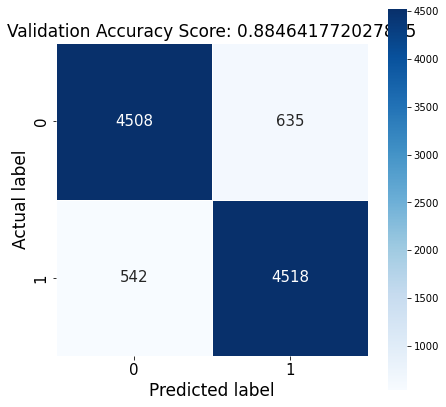

In [83]:
# To visualise the confusion matrix RandomForestClassifier

plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix_RF_classifier, annot=True,
            fmt=".0f",
            annot_kws={"size": 15},
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Validation Accuracy Score: {}'.format(validation_score_RF_classifier), size = 17);
plt.tick_params(labelsize= 15)

In [84]:
# To provide a report of the performance measures outcomes.

print(classification_report(y_predictions_RF_classifier, Y_valid, digits=4))

              precision    recall  f1-score   support

           0     0.8927    0.8765    0.8845      5143
           1     0.8768    0.8929    0.8848      5060

    accuracy                         0.8846     10203
   macro avg     0.8847    0.8847    0.8846     10203
weighted avg     0.8848    0.8846    0.8846     10203



In [92]:
# Predict for Multiple Observations at Once
RF_prediction = RF_classifier.predict_proba(X_test[0:])

Imputing missing values in feature set


In [93]:
RF_prediction = pd.DataFrame(RF_prediction)

In [94]:
RF_prediction.value_counts()

0         1       
1.000000  0.000000    7961
0.983333  0.016667     744
0.900000  0.100000     336
0.000000  1.000000     247
0.800000  0.200000     112
0.100000  0.900000      69
0.850000  0.150000      57
0.950000  0.050000      55
0.700000  0.300000      38
0.750000  0.250000      38
0.300000  0.700000      34
0.400000  0.600000      27
0.650000  0.350000      23
0.883333  0.116667      23
0.350000  0.650000      16
0.200000  0.800000      15
0.150000  0.850000      14
0.525000  0.475000      12
0.375000  0.625000      12
0.600000  0.400000      12
0.883333  0.116667      12
0.250000  0.750000      12
0.450000  0.550000      11
0.425000  0.575000      10
0.925000  0.075000       9
0.325000  0.675000       9
0.550000  0.450000       8
0.575000  0.425000       8
0.783333  0.216667       7
0.500000  0.500000       7
0.275000  0.725000       7
0.083333  0.916667       6
0.183333  0.816667       6
0.625000  0.375000       5
0.933333  0.066667       4
0.775000  0.225000       3
0.483333 

In [95]:
RF_prediction.to_csv('nonglmresults.csv', index=False)

Imputing missing values in feature set


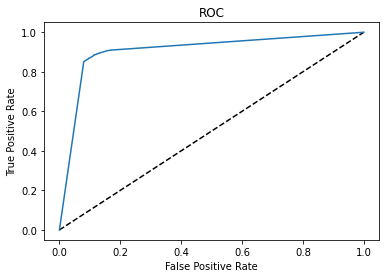

In [109]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
RF_y_pred_prob = RF_classifier.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = roc_curve(Y_valid, RF_y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [111]:
# calculate AUC
AUC = roc_auc_score(Y_valid, RF_y_pred_prob)
print('AUC: %.4f' % AUC)

AUC: 0.9064


## Model Comparison

At first stage, I have trained both models on. the given data without applying SMOTE technique to balance the class. The LR performed better with an accuracy of around 86% while RF performed better after balancing the class with an accuracy 85%. The LR model also outperformed and prediction accuracy among all other initial suggested models, which was the reason behind selecting RF over other models.

Both Logistic Regression (LR) and Random Forests (RF) have many advantages and disadvantages when it comes to predict binary class.

Logistic Regression has the following advantages in this study:

1. Logistic regression is easier to implement, and very efficient to train binary class.

2. Logistic regression takes much less time to train and predict the values comparing to other non linear models. Therefore, when it comes to developing models to predict sensitive transactions like fraud detection, time is a very sensitive factor.

However, it has many disadvantages as the following:

1. The major limitation of LR in this work is the assumption of linearity between the dependent variable (Target) and the independent variables (Feature).

2. It is tough to obtain complex relationships using LR. More powerful and compact algorithms such as RF can easily outperform this algorithm.

On the other hand, Random forests, shows advantages over Logistic Regression as follow:

1. Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.

2. Random Forest is usually robust to outliers and can handle them automatically. It  is comparatively less impacted by noise than LR.

However, the Random forests has the following disadvantages:

1. It is a complex model as it creates a lot of trees and combines their outputs. 

2. It is therefore, requires much more computational power and resources than LR. (As we can see above, there is a huge difference in the training time between both models).

We can see that the AUC value for each model is different based on model validation and validation dataset. RF has AUC of (0.9064) higher than LR which is (0.8459). Therefore, the RF model has better learning ability than LR, which means that has better learning and prediction ability than LR model. The validation AUC is described in the below table:

| Model (Validation dataset) | AUC Score |
| -------------------------- |:---------:|
| Logistic  Regression       | 0.8459    |
| Random Forests             | 0.9064    |

Based on the accuracy and AUC score, we can estimate the AUC of each model on the testing dataset to be close to the above values in the validation dataset as indicating the below table:


| Model (Estimate on test dataset) | AUC Score |
| -------------------------------- |:---------:|
| Logistic Regression              | 0.8204    |
| Random Forests                   | 0.9135    |

## Conclusion

Conclusion
•	In this project, we created two models to predict the outcome of a given data. The target was binary category (0, 1). The first model was linear Logistic Regression (LR) and the second model was based on ensemble learning technique which is Random Forests (RF).

•	Both models performed well. However, the RF outperformed the LR model with a prediction accuracy of 87.8% comparing to 77.1%.

•	Since the area under the ROC curve (AUC) results were between (0.9 – 1) for RF, it is considered excellent value and therefore presents better prediction model comparing to LR, where its value lies between (0.8 – 0.9).

•	In this stage, if we need to select one model between both models that will depend on the need for this model. for example, if the client concerns more about the time of prediction and the ACCURACY is not as important as prediction time, then the LR is more Favorable in this stage. However, if the client concerns more about the model prediction accuracy, then RF would be a better choice at this stage.